# Setup
## Imports

In [1]:
# If colab then setup else pass to rest of the code
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    %cd /content/drive/MyDrive/Coding/spread-res/runscr/
except ImportError: pass

# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import setup_config
from utils.trainutil import train_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [2]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "50",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 2,
    "num_attention_heads": 2,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 2,
    "lr": 5e-5,
    "mu": 0.25,
    "epochs": 50,
    "patience": 2,
    "save_int": 5,
}

# input_config = {
#     # Environment and Model Info
#     "env": "local",
#     "approach": "bert",
#     "model_name": "BertGrid",
#     "model_base": "bert-base-cased",
#     "data_ds": "manual",
#     # BERT Architecture Parameters
#     "vocab_size": 30522,
#     "hidden_size": 128,
#     "num_hidden_layers": 1,
#     "num_attention_heads": 1,
#     "intermediate_size": 512,
#     "gradient_checkpointing": False,
#     # Training Parameters
#     "batch_size": 5,
#     "lr": 1e-3,
#     "mu": 0.25,
#     "epochs": 3,
#     "patience": 2,
#     "save_int": 2,
# }
config = setup_config(input_config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

# Define the model
untrained_model = BertGrid(config).to(DEVICE)

Processing files: 100%|██████████| 40/40 [00:07<00:00,  5.05it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5854.70it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5205.14it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGrid",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "50",
  "data_dir": "../data",
  "train_dir": "../data/50_train",
  "val_dir": "../data/50_val",
  "test_dir": "../data/50_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 2,
  "num_attention_heads": 2,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 2,
  "lr": 5e-05,
  "mu": 0.25,
  "epochs": 50,
  "patience": 2,
  "save_in

# Model Training

In [3]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.3947e+00, Val Loss: 1.5409e+00


Epoch 1


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.1632e+00, Val Loss: 1.2608e+00


Epoch 2


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.0518e+00, Val Loss: 1.0136e+00


Epoch 3


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 9.1079e-01, Val Loss: 7.7145e-01


Epoch 4


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 7.4159e-01, Val Loss: 4.9571e-01

Model Saved

Epoch 5


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]


Train Loss: 4.3292e-01, Val Loss: 2.3699e-01


Epoch 6


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 2.8136e-01, Val Loss: 1.6338e-01


Epoch 7


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.9781e-01, Val Loss: 1.2950e-01


Epoch 8


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.9481e-01, Val Loss: 1.1910e-01


Epoch 9


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.6546e-01, Val Loss: 1.1116e-01

Model Saved

Epoch 10


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.8583e-01, Val Loss: 1.0643e-01


Epoch 11


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.7054e-01, Val Loss: 1.0361e-01


Epoch 12


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.5215e-01, Val Loss: 9.6068e-02


Epoch 13


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.2826e-01, Val Loss: 9.3532e-02


Epoch 14


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]


Train Loss: 1.3461e-01, Val Loss: 9.4266e-02

Model Saved

Epoch 15


Validation Processing: 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]


Train Loss: 1.0829e-01, Val Loss: 1.0605e-01


EARLY STOPPING at epoch 15, best epoch 13
Train Loss = 1.2826e-01, Val Loss = 9.3532e-02
Total Training Time = 01:52


TRAINING DONE at epoch 15, best epoch 13
Train Loss = 0.12825778741389512, Perplexity = 1.0000064129099333
Val Loss = 0.09353171288967133, Perplexity = 1.0000046765965798
Total Training Time = 01:52


# Evaluation


Filename: ../data/50_train/CCDC-Manuscript-Data_STICKS-SCIHUB_FINAL.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,15): 0.970677 | (0,17): 0.972238 | (0,13): 0.973853 | (0,7): 0.976099 | (0,16): 0.976839 | (0,14): 0.977988 | (0,11): 0.978157 | (0,9): 0.978167 | (0,5): 0.978443 | (0,8): 0.978638 | (0,10): 0.978774 | (0,3): 0.980440 | (0,4): 0.982315 | (0,2): 0.983586 | (0,1): 0.984591

NB to B ratio: Predicted = 9978:22 | Actual = 9985:15
Accuracy: 99.93% | Precision: 68.18% | Recall: 100.00% | F1-Score: 0.81



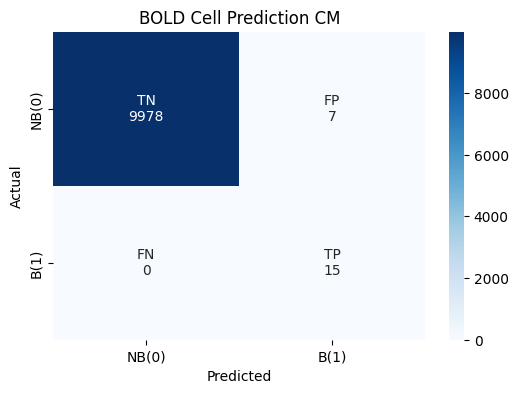


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1



Filename: ../data/50_val/IBACOS_FTP%20Data%20Descriptions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(1,1): 0.891893 | (13,1): 0.967256 | (17,1): 0.973056 | (6,1): 0.979137 | (1,3): 0.980674 | (1,4): 0.982320 | (1,2): 0.984146 | (2,1): 0.984270

NB to B ratio: Predicted = 9958:42 | Actual = 9992:8
Accuracy: 99.62% | Precision: 14.29% | Recall: 75.00% | F1-Score: 0.24



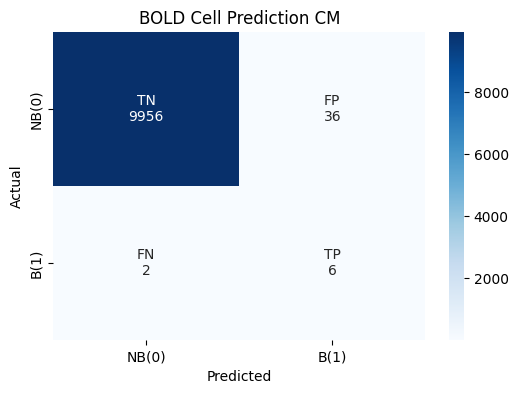


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4
1,0,1,1,1
2,1,0,0,0
3,0,1,0,1
4,0,1,1,1
5,0,1,0,1
6,1,0,0,0
7,0,1,1,1
8,0,1,1,1
9,0,0,0,1
10,1,1,1,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4
1,1,1,1,1
2,1,0,0,0
6,1,0,0,0
13,1,0,0,0
17,1,0,0,0



Filename: ../data/50_test/darrell_schoolcraft_000_1_1_1.pst.591.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(3,17): 0.123931 | (3,18): 0.399114 | (3,16): 0.450695 | (3,13): 0.904533 | (4,4): 0.918106 | (4,5): 0.940278 | (4,0): 0.940625 | (4,16): 0.941995 | (4,9): 0.942945 | (5,18): 0.951663 | (4,3): 0.957814 | (4,20): 0.960854 | (4,11): 0.965784 | (4,18): 0.966066 | (5,12): 0.966638 | (3,12): 0.967061 | (3,3): 0.969623 | (4,6): 0.972049 | (4,2): 0.974344 | (4,10): 0.975416 | (0,15): 0.976174 | (1,15): 0.976529 | (0,17): 0.976544 | (1,17): 0.976716 | (0,21): 0.976728 | (0,19): 0.977024 | (1,21): 0.977154 | (4,15): 0.977232 | (4,12): 0.977282 | (0,20): 0.977297 | (4,21): 0.977411 | (1,19): 0.977511 | (4,14): 0.977616 | (0,13): 0.977655 | (0,18): 0.977709 | (3,4): 0.977730 | (1,20): 0.977835 | (4,8): 0.977873 | (1,18): 0.977931 | (2,18): 0.978108 | (1,13): 0.978176 | (2,20): 0.978235 | (0,7): 0.978238 | (0,16): 0.978611 | (2,16): 0.978824 | (2,15): 0.978967 | (2,10): 0.97898

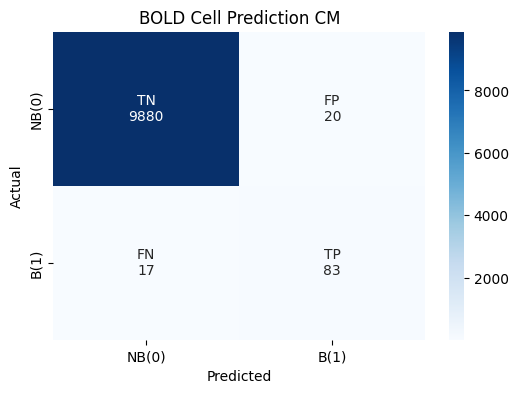


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,1,0,1
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [11]:
# Params
loc = 1
thresh = 0.97

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    config=config,
    disp_sig=True,
)

Batch Inference: 100%|██████████| 20/20 [00:02<00:00,  8.47it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 398823:1177 | Actual = 399199:801
Accuracy: 99.82% | Precision: 39.89% | Recall: 62.24% | F1-Score: 0.45



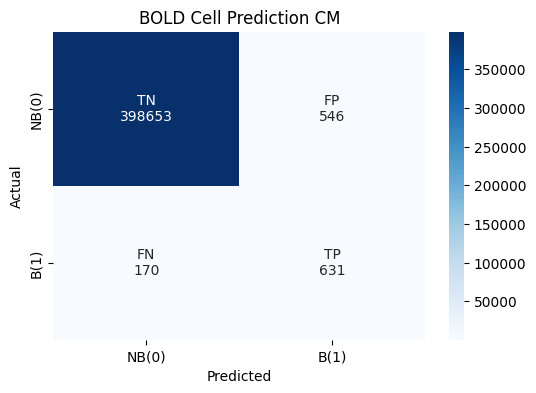

Batch Inference: 100%|██████████| 3/3 [00:00<00:00, 10.05it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49783:217 | Actual = 49846:154
Accuracy: 99.77% | Precision: 54.97% | Recall: 78.36% | F1-Score: 0.58



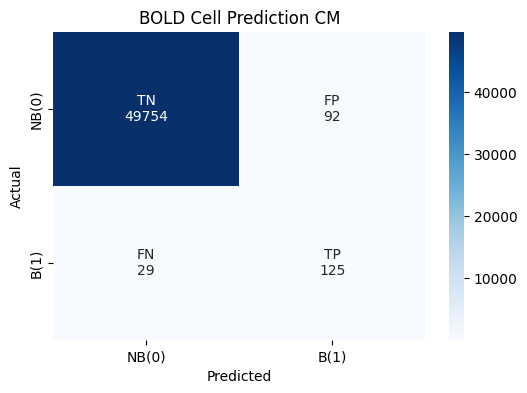

Batch Inference: 100%|██████████| 3/3 [00:00<00:00, 10.08it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49654:346 | Actual = 49801:199
Accuracy: 99.42% | Precision: 26.02% | Recall: 44.23% | F1-Score: 0.32



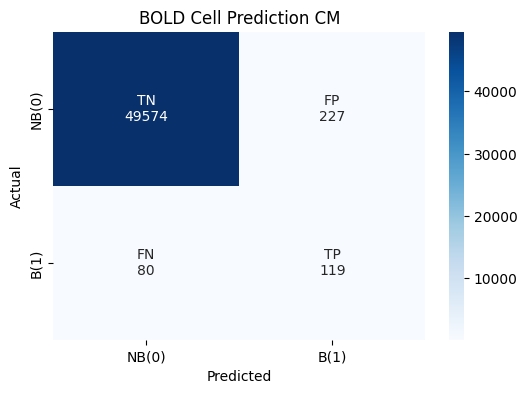

In [12]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)

# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)

# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    config=config,
)